## TRAINING DATASET

### Basic Configurations

In [84]:
# Importing libraries
import pandas as pd

# Load the training dataset
df_train = pd.read_csv("train.csv")

# Combine title and description
df_train["Text"] = df_train["Title"] + " " + df_train["Description"]

# Prepare inputs and labels
X = df_train["Text"]
y = df_train["Class Index"] - 1  # To make classes go from 0-3 instead of 1-4

### Data Cleaning

In [86]:
df_train["Text"].head()
# df.info()

0    Wall St. Bears Claw Back Into the Black (Reute...
1    Carlyle Looks Toward Commercial Aerospace (Reu...
2    Oil and Economy Cloud Stocks' Outlook (Reuters...
3    Iraq Halts Oil Exports from Main Southern Pipe...
4    Oil prices soar to all-time record, posing new...
Name: Text, dtype: object

In [87]:
# Lowercasing
df_train["Text"] = df_train["Text"].str.lower()

In [88]:
# Removing special chars and panctuation
import re

def clean_text(text):
    return re.sub(r"[^\w\s]", "", text)

df_train["Text"] = df_train["Text"].apply(clean_text)

In [89]:
# Removing stopwords
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("English"))

def remove_stopwords(text):
    words = text.split()        # split sentence to words
    filtered_words = [word for word in words if word not in stop_words]     # remove stopwords
    return " ".join(filtered_words)      # rebuild filtered sentence

df_train["Text"] = df_train["Text"].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [90]:
# Lemmatizing words
from nltk.stem import WordNetLemmatizer

nltk.download("wordnet")  
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    words = text.split()        # split sentence to words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]   # lemmatize
    return " ".join(lemmatized_words)       # rebuild lemmatized sentence

df_train["Text"] = df_train["Text"].apply(lemmatize_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [91]:
df_train.rename(columns = {"Class Index": "Label"}, inplace = True)   # rename class index column for clarity
df_train.drop(columns = ["Title", "Description"], inplace = True)     # remove unnecessary columns

In [92]:
# Mapping numbers to class names
label_map = {
    1: "World",
    2: "Sports",
    3: "Business",
    4: "Sci/Tech"
}

df_train["Label Name"] = df_train["Label"].map(label_map)

In [93]:
df_train.head()

,Label,Text,Label Name
0,3,wall st bear claw back black reuters reuters s...,Business
1,3,carlyle look toward commercial aerospace reute...,Business
2,3,oil economy cloud stock outlook reuters reuter...,Business
3,3,iraq halt oil export main southern pipeline re...,Business
4,3,oil price soar alltime record posing new menac...,Business


## TESTING DATASET

### Basic Configurations

In [94]:
# Load the training dataset
df_test = pd.read_csv("test.csv")

# Combine title and description
df_test["Text"] = df_test["Title"] + " " + df_test["Description"]

# Prepare inputs and labels
X = df_test["Text"]
y = df_test["Class Index"] - 1  # To make classes go from 0-3 instead of 1-4

### Data Cleaning

In [95]:
# Lowercasing
df_test["Text"] = df_test["Text"].str.lower()

In [96]:
# Removing special chars and panctuation
import re

def clean_text(text):
    return re.sub(r"[^\w\s]", "", text)

df_test["Text"] = df_test["Text"].apply(clean_text)

In [97]:
# Removing stopwords
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("English"))

def remove_stopwords(text):
    words = text.split()        # split sentence to words
    filtered_words = [word for word in words if word not in stop_words]     # remove stopwords
    return " ".join(filtered_words)      # rebuild filtered sentence

df_test["Text"] = df_test["Text"].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [98]:
# Lemmatizing words
from nltk.stem import WordNetLemmatizer

nltk.download("wordnet")  
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    words = text.split()        # split sentence to words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]   # lemmatize
    return " ".join(lemmatized_words)       # rebuild lemmatized sentence

df_test["Text"] = df_test["Text"].apply(lemmatize_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [99]:
df_test.rename(columns = {"Class Index": "Label"}, inplace = True)   # rename class index column for clarity
df_test.drop(columns = ["Title", "Description"], inplace = True)     # remove unnecessary columns

In [100]:
# Mapping numbers to class names
label_map = {
    1: "World",
    2: "Sports",
    3: "Business",
    4: "Sci/Tech"
}

df_test["Label Name"] = df_test["Label"].map(label_map)

In [101]:
df_test.head()

,Label,Text,Label Name
0,3,fear n pension talk union representing worker ...,Business
1,4,race second private team set launch date human...,Sci/Tech
2,4,ky company win grant study peptide ap ap compa...,Sci/Tech
3,4,prediction unit help forecast wildfire ap ap b...,Sci/Tech
4,4,calif aim limit farmrelated smog ap ap souther...,Sci/Tech


### Converting to HuggingFace

In [ ]:
from datasets import Dataset

# Converting trainig and testing datasets to HuggingFace datasets
train_dataset = Dataset.from_pandas(df_train)
test_dataset = Dataset.from_pandas(df_test)

### Vactorization (TF-IDF)

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Cleaned text var for train and test
X_train = df_train["Text"]
X_test = df_test["Text"]

# Cleaned label var for train and test
Y_train = df_train["Label"]
Y_test = df_test["Label"]


# Initializing vectorizer
vectorizer = TfidfVectorizer(max_features = 5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [112]:
feature_names = vectorizer.get_feature_names_out()
print(feature_names[:10])

['01' '02' '03' '04' '05' '10' '100' '1000' '10000' '100000']


### Training the Model (Logistic Regression)

In [114]:
from sklearn.linear_model import LogisticRegression

# Intializing the model
model = LogisticRegression(max_iter = 1000)

# Fitting the model
model.fit(X_train_tfidf, Y_train)

# Making predictions
y_pred = model.predict(X_test_tfidf)


### Evaluating the Model

In [115]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [118]:
# Accuracy Measures
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9057894736842105


In [136]:
# Classification report
class_rep = classification_report(Y_test, y_pred)
print("Classification Report:")
print(class_rep)

Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.90      0.91      1900
           2       0.95      0.98      0.96      1900
           3       0.87      0.87      0.87      1900
           4       0.88      0.88      0.88      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600



In [137]:
# Confusion matrix
conf_mat = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)

Confusion Matrix:
[[1709   58   80   53]
 [  21 1856   11   12]
 [  64   21 1651  164]
 [  62   25  145 1668]]


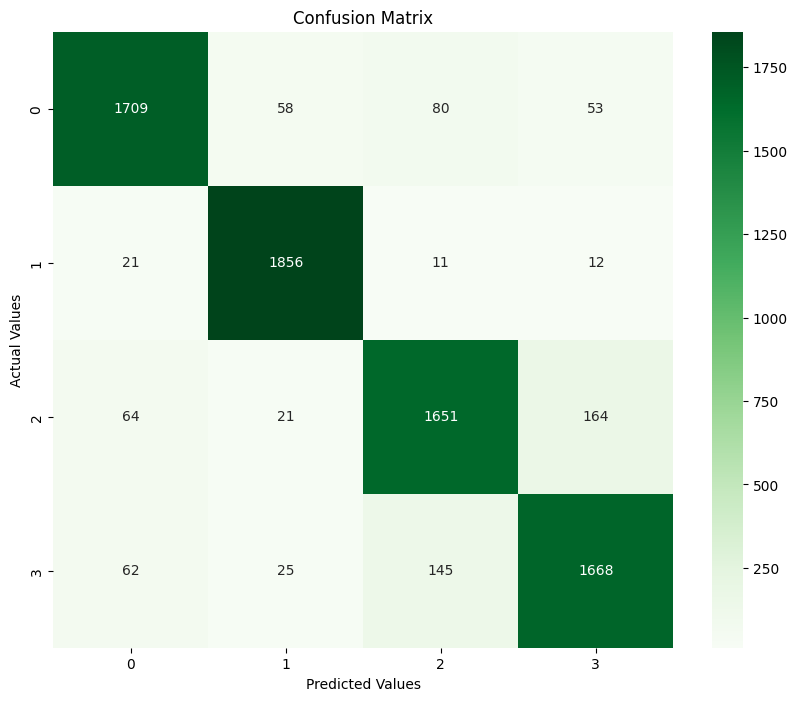

In [135]:
# Visualizing the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 8))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

###